#**Experience : Salary**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
upload =files.upload()

Saving Salary_Data.csv to Salary_Data (3).csv


In [ ]:
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


##**EDA AND DATA VISUALISATION**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Density'>

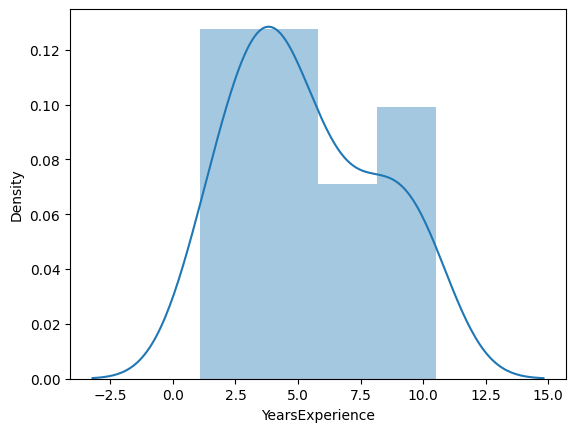

In [ ]:
sns.distplot(data['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

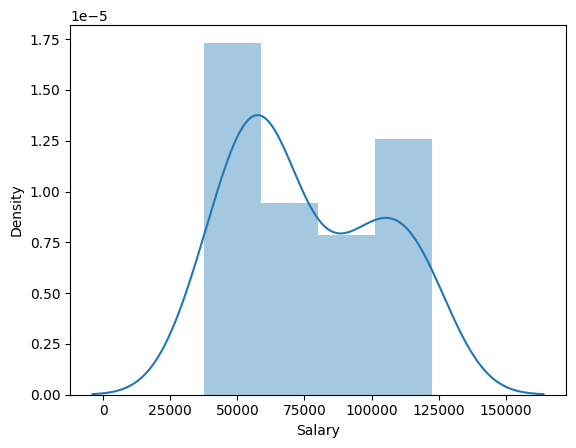

In [ ]:
sns.distplot(data['Salary'])

##**CORRELATION ANALYSIS**

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

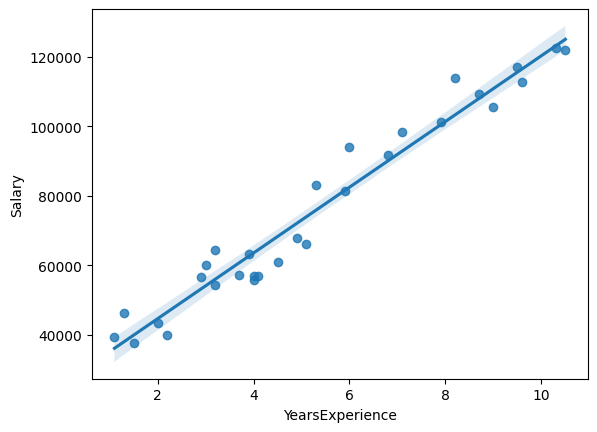

In [ ]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])

##**MODEL BUILDING**

In [ ]:
data1=pd.read_csv('Salary_Data.csv')

In [ ]:
model=smf.ols("Salary~YearsExperience",data=data1).fit()

##**MODEL TESTING**

In [ ]:
# Finding Coefficient Parameters
model.params



Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

##**MODEL PREDICTION**

In [ ]:
data1['predicition_values']=model.fittedvalues

In [ ]:
data1['error_values']=model.resid

In [ ]:
data1.head()

,YearsExperience,Salary,predicition_values,error_values
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306


#**MODEL PREDICTION USING LOG TRANSFORM**

In [ ]:
data2=pd.read_csv('Salary_Data.csv')

In [ ]:
data2['Salary_log']=np.log(data2['Salary'])
data2.head()

,YearsExperience,Salary,Salary_log
0,1.1,39343.0,10.580073
1,1.3,46205.0,10.740843
2,1.5,37731.0,10.538237
3,2.0,43525.0,10.681091
4,2.2,39891.0,10.593906


In [ ]:
x=data2['YearsExperience']
y=data2['Salary_log']

In [ ]:
model=smf.ols('y~x',data=data2).fit()

<Axes: xlabel='YearsExperience', ylabel='Salary_log'>

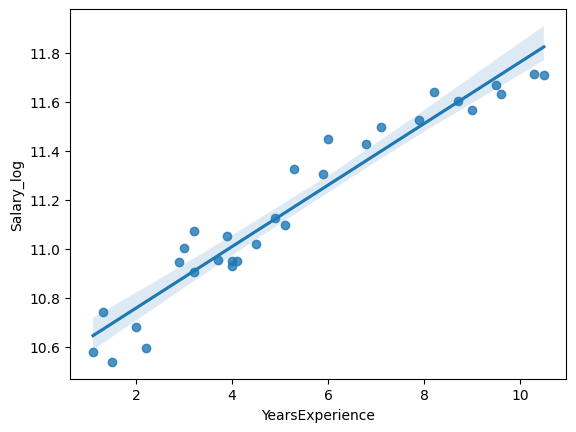

In [ ]:
sns.regplot(x=x,y=y,data=data2)

In [ ]:
model.params

Intercept    10.507402
x             0.125453
dtype: float64

In [ ]:
data2['predicition_values']=model.fittedvalues

In [ ]:
data2['error_values']=model.resid

In [ ]:
data2.head()

,YearsExperience,Salary,Salary_log,predicition_values,error_values
0,1.1,39343.0,10.580073,10.645400,-0.065327
1,1.3,46205.0,10.740843,10.670491,0.070353
2,1.5,37731.0,10.538237,10.695581,-0.157344
3,2.0,43525.0,10.681091,10.758308,-0.077217
4,2.2,39891.0,10.593906,10.783398,-0.189492


#**MODEL PREDICTION USING SQRT TRANSFORM**

In [ ]:
data3=pd.read_csv('Salary_Data.csv')

In [ ]:
data3.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data3['salary_sqrt']=np.sqrt(data3['Salary'])
data3.head()

,YearsExperience,Salary,salary_sqrt
0,1.1,39343.0,198.350700
1,1.3,46205.0,214.953483
2,1.5,37731.0,194.244691
3,2.0,43525.0,208.626460
4,2.2,39891.0,199.727314


In [ ]:
x=data3['YearsExperience']
y=data3['salary_sqrt']

In [ ]:
model=smf.ols('y~x',data=data3).fit()

<Axes: xlabel='YearsExperience', ylabel='salary_sqrt'>

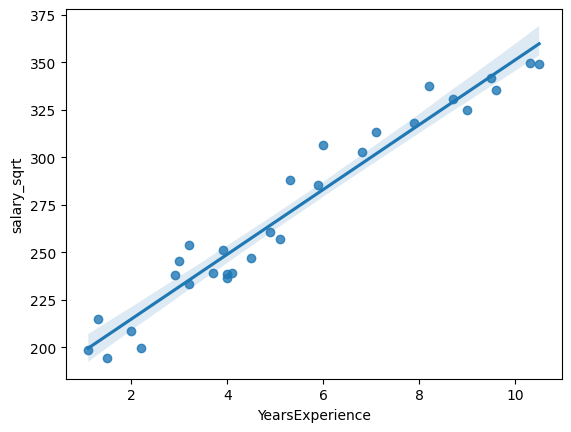

In [ ]:
sns.regplot(x=x,y=y,data=data3)

In [ ]:
model.params

Intercept    180.700221
x             17.056532
dtype: float64

In [ ]:
data3['predicition_values']=model.fittedvalues

In [ ]:
data3['error_values']=model.resid

In [ ]:
data3.head()

,YearsExperience,Salary,salary_sqrt,predicition_values,error_values
0,1.1,39343.0,198.350700,199.462407,-1.111707
1,1.3,46205.0,214.953483,202.873713,12.079770
2,1.5,37731.0,194.244691,206.285019,-12.040328
3,2.0,43525.0,208.626460,214.813286,-6.186825
4,2.2,39891.0,199.727314,218.224592,-18.497278
